# AMSC 661 Homework 1 
### Two-Step Explicit ODE Method for the 2D Gravity Problem 
#### February 8, 2023
#### Dominic Flocco 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:

def f(t,y):
    # definition of RHS for the 2D gravity ODE
    dy = np.zeros((4,))
    dy[0] = y[2]
    dy[1] = y[3]
    dy[2] = -y[0]/(y[0]**2 + y[1]**2)
    dy[3] = -y[1]/(y[0]**2 + y[1]**2)
    
    return dy


Two-step Explicit Method with N = 20:
Solution Norm at t = 4pi: 1.806404963906224e+24


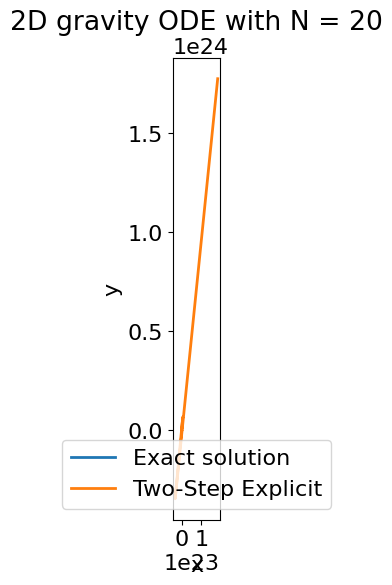

Two-step Explicit Method with N = 40:
Solution Norm at t = 4pi: 9.879683269363596e+50


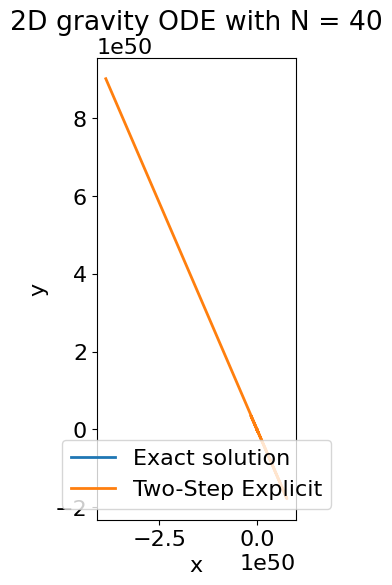

Two-step Explicit Method with N = 80:
Solution Norm at t = 4pi: 7.282651434646803e+105


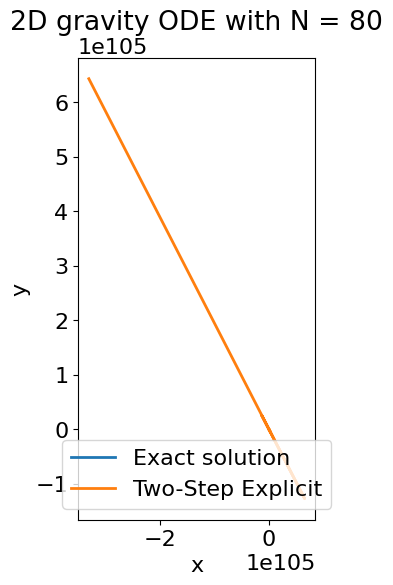

In [3]:

numSteps = [20, 40, 80]
y0 = np.array([1,0,0,1])
numLoops = 2
tt = np.linspace(0,2*np.pi,200)
for n in numSteps:

    h = 2*np.pi/n 
    iters = numLoops*n
    # two-step explicit method 
    u = np.zeros((iters+1, 4))
    u[0,:] = y0
    # initialize y1 with exact solution 
    u[1,:] = np.array([np.cos(h), np.sin(h), -np.sin(h), np.cos(h)])
    
    t = 2*h
    for i in range(1,iters):
        u[i+1,:] = -4*u[i,:] + 5*u[i-1,:] + h*4*f(t, u[i,:]) + h*2*f(t-h,u[i-1,:])
        
        t += h 

    print(f"Two-step Explicit Method with N = {n}:")
    # Compute iteration corresponding to t = 4pi 
    solNorm = np.linalg.norm(u[iters,:])
    print(f"Solution Norm at t = 4pi: {solNorm}")

    # plot solution x and y
    tt = np.linspace(0,2*np.pi,n)
    plt.rcParams.update({'font.size': 16})
    fig, ax = plt.subplots(figsize=(6,6))
    plt.plot(np.cos(tt),np.sin(tt),linewidth=2,label='Exact solution')
    plt.plot(u[:,0],u[:,1],linewidth=2,label='Two-Step Explicit')  
    plt.title(f"2D gravity ODE with N = {n}")
    plt.legend(loc="lower center")
    plt.xlabel("x")
    plt.ylabel("y")
    ax.set_aspect(1)
    plt.show()